In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
download.file(url, "pulsar_data.zip")
unzip("pulsar_data.zip")
pulsar_data<-read_csv("HTRU_2.csv", col_names = FALSE) 

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
pulsar_data

X1,X2,X3,X4,X5,X6,X7,X8,X9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


In [4]:
pulsar_data <- rename(pulsar_data, mean_integrated = X1,
      std_integrated = X2,
      excess_kurtosis_integrated = X3,
      skewness_integrated = X4,
      mean_DMSNR = X5,
      std_DMSNR = X6,
      excess_kurtosis_DMSNR = X7,
      skewness_DMSNR = X8,
      pulsar = X9) %>%
mutate(pulsar= as.factor(pulsar))

Split

In [5]:
pulsar_split <- initial_split(pulsar_data, prop = 0.75 , strata = pulsar)
pulsar_training <- training(pulsar_split)
pulsar_testing <- testing(pulsar_split)

Summary

In [6]:
data_summary_no <- pulsar_training %>%
select(mean_integrated, mean_DMSNR, pulsar) %>%
filter(pulsar== "0") %>%
summarise(mean_mean_DMSNR = mean(mean_DMSNR),
         mean_mean_integrated = mean(mean_integrated),
         pulsar = pulsar) %>%
slice(n=1)
data_summary_no
data_summary_yes <- pulsar_training %>%
select(mean_integrated, mean_DMSNR, pulsar) %>%
filter(pulsar== "1") %>%
summarise(mean_mean_DMSNR = mean(mean_DMSNR),
         mean_mean_integrated = mean(mean_integrated),
         pulsar = pulsar) %>%
slice(n=1)
data_summary_yes

mean_mean_DMSNR,mean_mean_integrated,pulsar
<dbl>,<dbl>,<fct>
8.759878,116.5071,0


mean_mean_DMSNR,mean_mean_integrated,pulsar
<dbl>,<dbl>,<fct>
49.05392,57.1482,1


Visuallizeation of summary

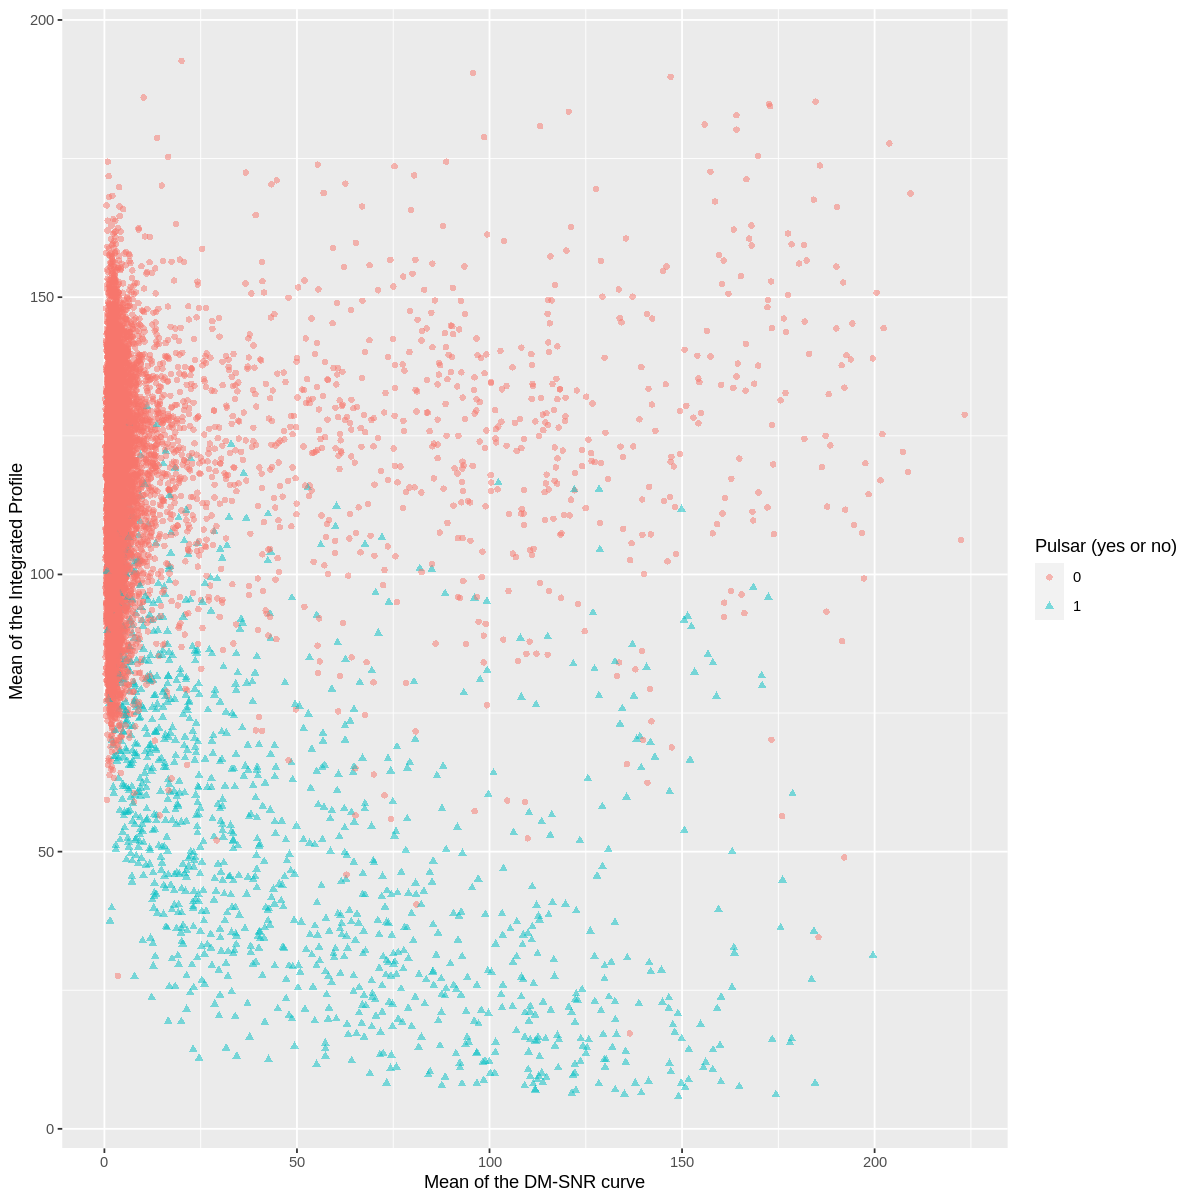

In [7]:
options(repr.plot.width=10, repr.plot.height=10)
pulsar_plot <- pulsar_training %>%
ggplot(aes(x=mean_DMSNR, y= mean_integrated, colour= pulsar, shape = pulsar)) +
geom_point(alpha = 0.5) +
labs(x="Mean of the DM-SNR curve", y= "Mean of the Integrated Profile ", 
     colour= "Pulsar (yes or no)", shape = "Pulsar (yes or no)")
pulsar_plot

Setting up a classification model

Selecting relevent columns for classification

In [8]:
pulsar_data <- pulsar_data|>
select(mean_integrated, mean_DMSNR,pulsar)

scaling and centering

In [9]:
pulsar_recipe<- recipe(pulsar ~., data = pulsar_data)
print(pulsar_recipe)

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2


In [10]:
pulsar_recipe <- pulsar_recipe|>
step_scale(all_predictors())|>
step_center(all_predictors())|>
prep()
pulsar_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Training data contained 17898 data points and no missing data.

Operations:

Scaling for mean_integrated, mean_DMSNR [trained]
Centering for mean_integrated, mean_DMSNR [trained]

In [11]:
scaled_data <- bake(pulsar_recipe, pulsar_data)
scaled_data

mean_integrated,mean_DMSNR,pulsar
<dbl>,<dbl>,<fct>
1.14928492,-0.31943133,0
-0.33415887,-0.37109152,0
-0.31436338,-0.32209803,0
1.00066645,-0.30439570,0
-0.87137809,-0.38799952,0
-0.68255954,-0.37248160,0
0.32761969,-0.39409888,0
0.75246142,-0.38658106,0
-0.14929942,-0.34887849,0


In [18]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5)|>
            set_engine ("kknn")|>
            set_mode ("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 2
  weight_func = rectangular

Computational engine: kknn 


Setting up workflow

In [21]:
knn_fit <- workflow()|>
           add_recipe(pulsar_recipe)|>
           add_model(knn_spec)|>
           fit(data = pulsar_data )
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03385853
Best kernel: rectangular
Best k: 2

In [23]:
new_observation <- tibble(mean_integrated = 1.0978745, mean_DMSNR = 0.874389)
prediction <- predict(knn_fit, new_observation)
prediction

.pred_class
<fct>
1
